# client

In [1]:
import obspy
from obspy import UTCDateTime
from obspy.clients.filesystem.sds import Client
import numpy as np
import datetime
import time
import pandas as pd

In [2]:
def get_mseed(time, client=Client('/media/manuela/UNTITLED/illgraben/miniseed'), stations=['ILL12'],
              channels=['EHZ'], locations=[''], prepick=0, window_length=24*60*60.):

    st = obspy.Stream()
    for station in stations:
        for location in locations:
            for channel in channels:
                try:           
                    new_st = client.get_waveforms('XP', station, location, channel,
                                                UTCDateTime(time)-prepick, 
                                                UTCDateTime(time)-prepick+window_length)
                    st += new_st
                except:
                    continue
    return(st)

In [3]:
st_test = get_mseed(UTCDateTime('2019-06-10T00:00:00'))
st_test

1 Trace(s) in Stream:
XP.ILL12..EHZ | 2019-06-10T00:00:00.000000Z - 2019-06-11T00:00:00.000000Z | 100.0 Hz, 8640001 samples

# works

In [9]:
from obspy import read

In [34]:
st = read('/media/manuela/LaCie/ILLGRABEN/2018/ILL12/EH*.D/*142')
st

6 Trace(s) in Stream:
XP.ILL12..EHE | 2018-05-22T00:00:02.530000Z - 2018-05-22T17:25:44.450000Z | 100.0 Hz, 6274193 samples
XP.ILL12..EHE | 2018-05-22T17:25:45.660000Z - 2018-05-23T00:00:00.490000Z | 100.0 Hz, 2365484 samples
XP.ILL12..EHN | 2018-05-22T00:00:00.890000Z - 2018-05-22T17:25:44.450000Z | 100.0 Hz, 6274357 samples
XP.ILL12..EHN | 2018-05-22T17:25:45.660000Z - 2018-05-23T00:00:01.030000Z | 100.0 Hz, 2365538 samples
XP.ILL12..EHZ | 2018-05-22T00:00:00.930000Z - 2018-05-22T17:25:44.450000Z | 100.0 Hz, 6274353 samples
XP.ILL12..EHZ | 2018-05-22T17:25:45.660000Z - 2018-05-23T00:00:01.450000Z | 100.0 Hz, 2365580 samples

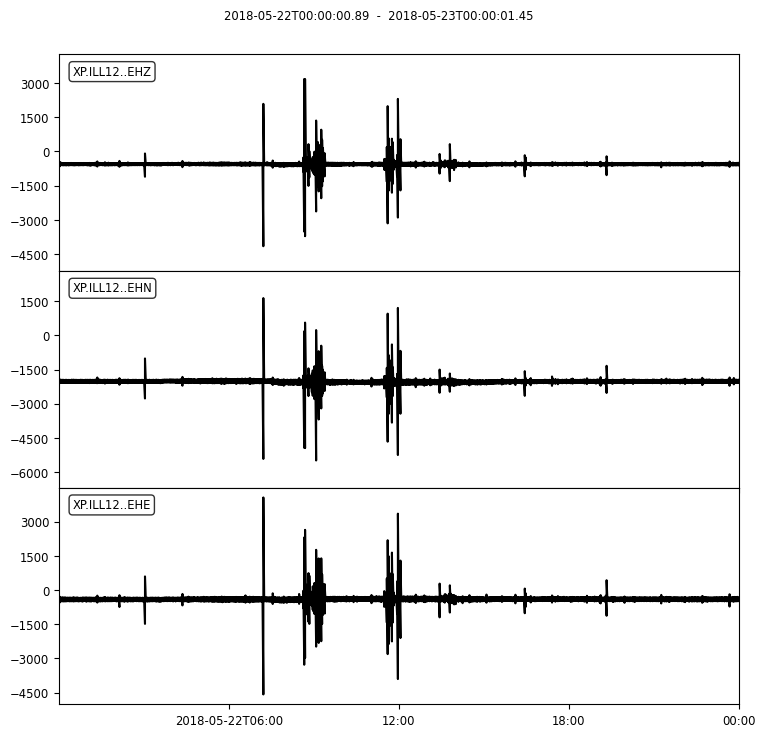

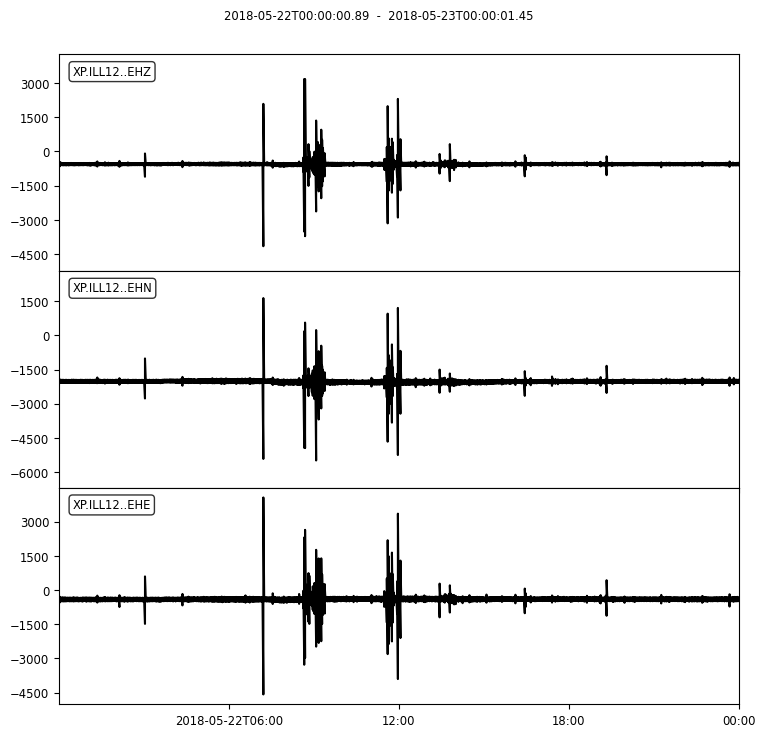

In [35]:
st.plot()

In [16]:
st[0].data

array([-2023, -2011, -1999, ..., -2028, -2043, -2021], dtype=int32)

In [25]:
st[0].stats

         network: XP
         station: ILL12
        location: 
         channel: EHN
       starttime: 2018-05-22T00:00:00.890000Z
         endtime: 2018-05-22T17:25:44.450000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 6274357
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 15700, 'encoding': 'STEIM1', 'byteorder': '>', 'record_length': 512, 'filesize': 10978304})